In [1]:
#install python 3.7
#pip install spacy
#pip install pyLDAvis
#python -m spacy download en_core_web_md
#pip install matpllotlib
#pip install nltk
#pip install 
#pip install python-Levenshtein
#pip install --upgrade ipykernel


import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
from sklearn.datasets import fetch_20newsgroups
from gensim.parsing.preprocessing import remove_stopwords
import re


c:\users\ezone\appdata\local\programs\python\python37\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
#newsgroups_train

In [3]:
def sent_to_words(sentences):
   for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
   return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
   return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
     doc = nlp(" ".join(sent))
     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out


In [4]:
data = newsgroups_train.data
data = [re.sub(r'\s*@\s*\s?', '', sent) for sent in data]
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]

print(data[0])
print(data[1])


From: lerxstwam.umd.edu (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: 15 I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail. Thanks, - IL ---- brought to you by your neighborhood Lerxst ---- 
From: guykuocarson.u.washington.edu (Guy Kuo) Subject: SI Clock Poll - Final Call Summary: Final call for SI clock reports Keywords: SI,acceleration,clock,upgrade Article-I.D.: shelley.1qvfo9INNc3s Organization: University of Washington Lines: 11 NNTP-Posting-Host: carson.u.washington.edu A

In [5]:
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data)
print(data_words[:4]) #it will print the data after prepared for stopwords

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
trigram_mod = gensim.models.phrases.Phraser(trigram)


[['lerxstwam', 'umd', 'wheres', 'thing', 'car', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'door', 'sports', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'doors', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'neighborhood', 'lerxst'], ['guykuocarson', 'washington', 'guy', 'kuo', 'si', 'clock', 'poll', 'final', 'call', 'summary', 'final', 'call', 'si', 'clock', 'reports', 'keywords', 'si', 'acceleration', 'clock', 'upgrade', 'article', 'shelley', 'qvfo', 'innc', 'organization', 'university', 'washington', 'lines', 'nntp', 'posting', 'host', 'carson', 'washington', 'fair', 'number', 'brave', 'souls', 'upg

In [6]:
data_words_nostops = data_words
data_words_bigrams = make_bigrams(data_words_nostops)


In [7]:
nlp = spacy.cli.download('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [8]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

In [9]:

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=[
   'NOUN', 'ADJ', 'VERB', 'ADV'
])
print(data_lemmatized[:4]) #it will print the lemmatized data.

[['where', 's', 'thing', 'car', 'nntp_poste', 'host', 'rac_wam', 'park', 'line', 'wondering_anyone', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'bricklin', 'door', 'really', 'small', 'addition', 'separate', 'rest', 'body', 'know', 'tellme', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst'], ['guykuocarson_washington', 'guy_kuo', 'si', 'clock', 'poll', 'final', 'call', 'summary', 'final', 'call', 'si', 'clock', 'report', 'keyword', 'si', 'acceleration', 'clock', 'upgrade', 'qvfo', 'line', 'nntp_poste', 'fair', 'number', 'brave', 'soul', 'upgrade', 'si', 'clock', 'oscillator', 'share', 'experience', 'poll', 'send', 'brief', 'message', 'detail', 'experience', 'procedure', 'top', 'speed', 'attain', 'cpu', 'rate', 'speed', 'add', 'card', 'adapter', 'hour', 'usage', 'day', 'functionality', 'floppy', 'especially', 'request', 'summ

In [10]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:4]) #it will print the corpus we created above.


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 5), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(4, 2), (6, 2), (18, 1), (25, 1), (38, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 5), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 3), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 4), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 3), (89, 1)], [(6, 2), (14, 2), (15, 1), (18, 2), (19, 2), (21, 1), (29, 2), (31, 1), (38, 1), (46, 1), (55, 2), (59, 1), (65, 1), (70, 1), (71, 1), (86, 1), (90, 1),

In [11]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:4]] 
#it will print the words with their frequencies.


[[('addition', 1),
  ('body', 1),
  ('bricklin', 1),
  ('bring', 1),
  ('call', 1),
  ('car', 5),
  ('day', 1),
  ('door', 2),
  ('early', 1),
  ('engine', 1),
  ('enlighten', 1),
  ('funky', 1),
  ('history', 1),
  ('host', 1),
  ('info', 1),
  ('know', 1),
  ('late', 1),
  ('lerxst', 1),
  ('line', 1),
  ('look', 2),
  ('mail', 1),
  ('make', 1),
  ('model', 1),
  ('name', 1),
  ('neighborhood', 1),
  ('nntp_poste', 1),
  ('park', 1),
  ('production', 1),
  ('rac_wam', 1),
  ('really', 1),
  ('rest', 1),
  ('s', 1),
  ('see', 1),
  ('separate', 1),
  ('small', 1),
  ('spec', 1),
  ('sport', 1),
  ('tellme', 1),
  ('thank', 1),
  ('thing', 1),
  ('where', 1),
  ('wondering_anyone', 1),
  ('year', 1)],
 [('call', 2),
  ('day', 2),
  ('line', 1),
  ('nntp_poste', 1),
  ('thank', 1),
  ('acceleration', 1),
  ('adapter', 1),
  ('add', 2),
  ('answer', 1),
  ('attain', 1),
  ('base', 1),
  ('brave', 1),
  ('brief', 1),
  ('card', 1),
  ('clock', 5),
  ('cpu', 1),
  ('detail', 1),
  ('do', 

In [12]:
# lda_model = gensim.models.ldamodel.LdaModel(
#    corpus=corpus, id2word=id2word, num_topics=20, random_state=100, 
#    update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True
# )

len(corpus)

11314

In [13]:
# Hyper-parameter tuning (this may take very long time and performance will improve when you use CPU intensive hardware or distributed computing)
# Parametres getting tuned are num_topics, alpha (doc topic density), beta (topic word density)  
# I am not running this again as I have stored the result already in lda_tuning_results.csv whihc i will use directly to identify the right set of parameters

def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()


import math
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, math.floor(num_of_docs*0.25)), 
               # gensim.utils.ClippedCorpus(corpus, math.floor(num_of_docs*0.5)), 
               #gensim.utils.ClippedCorpus(corpus, math.floor(num_of_docs*0.75)), 
               corpus]
corpus_title = ['100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=270)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

  5%|█████▋                                                                                                                 | 13/270 [08:30<2:41:35, 37.73s/it]

KeyboardInterrupt: 

In [14]:
df= pd.DataFrame(model_results)
df=pd.read_csv('lda_tuning_results.csv')
df.sort_values('Coherence',ascending=False)

# Topics: 9 , Alpha: 0.61 , Beta: 0.9099999999999999 , C_v Coherence: 0.690559

,Validation_Set,Topics,Alpha,Beta,Coherence
223,100% Corpus,9,0.61,0.9099999999999999,0.690559
217,100% Corpus,9,0.31,0.61,0.656348
153,100% Corpus,7,0.01,0.9099999999999999,0.654010
198,100% Corpus,8,0.9099999999999999,0.9099999999999999,0.650444
123,100% Corpus,6,0.01,0.9099999999999999,0.644401
...,...,...,...,...,...
17,100% Corpus,2,0.9099999999999999,0.61,0.449799
10,100% Corpus,2,0.61,0.01,0.447564
11,100% Corpus,2,0.61,0.31,0.445781
19,100% Corpus,2,0.9099999999999999,symmetric,0.432045


In [15]:
# filter by tuned value of alpha and beta
df1=df.loc[(df['Alpha'] == '0.61') & (df['Beta'] == '0.9099999999999999')]
df1

,Validation_Set,Topics,Alpha,Beta,Coherence
13,100% Corpus,2,0.61,0.9099999999999999,0.469993
43,100% Corpus,3,0.61,0.9099999999999999,0.511208
73,100% Corpus,4,0.61,0.9099999999999999,0.528924
103,100% Corpus,5,0.61,0.9099999999999999,0.585327
133,100% Corpus,6,0.61,0.9099999999999999,0.590867
163,100% Corpus,7,0.61,0.9099999999999999,0.602116
193,100% Corpus,8,0.61,0.9099999999999999,0.587360
223,100% Corpus,9,0.61,0.9099999999999999,0.690559
253,100% Corpus,10,0.61,0.9099999999999999,0.582878


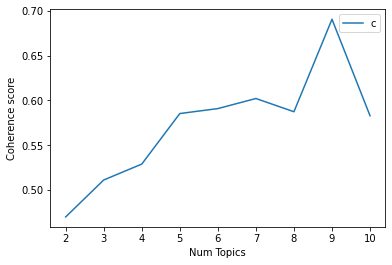

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1["Topics"], df1["Coherence"])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()



In [17]:

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.61,
                                           eta=0.9099999999999999)
lda_model

In [18]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.014*"line" + 0.008*"use" + 0.008*"com" + 0.008*"organization" + '
  '0.007*"drive" + 0.006*"system" + 0.006*"file" + 0.006*"window" + '
  '0.006*"program" + 0.006*"nntp_poste"'),
 (1,
  '0.231*"ax" + 0.001*"qax" + 0.000*"bhj_bhj" + 0.000*"m" + 0.000*"max" + '
  '0.000*"_" + 0.000*"pmfq" + 0.000*"biz" + 0.000*"tm" + 0.000*"pl_pl"'),
 (2,
  '0.009*"bike" + 0.005*"ride" + 0.004*"motorcycle" + 0.003*"rider" + '
  '0.002*"helmet" + 0.002*"dog" + 0.001*"wave" + 0.001*"biker" + 0.001*"cage" '
  '+ 0.001*"egreeneast_sun"'),
 (3,
  '0.011*"gun" + 0.007*"government" + 0.005*"kill" + 0.005*"israeli" + '
  '0.004*"soldier" + 0.004*"lebanese" + 0.004*"murder" + 0.004*"death" + '
  '0.004*"weapon" + 0.004*"crime"'),
 (4,
  '0.024*"key" + 0.007*"ripem" + 0.007*"encryption" + 0.006*"chip" + '
  '0.005*"clipper" + 0.005*"encrypt" + 0.005*"security" + 0.004*"government" + '
  '0.004*"secure" + 0.004*"public"'),
 (5,
  '0.029*"_" + 0.007*"c" + 0.005*"m" + 0.002*"rlk" + 0.002*"d" + 0.002*"cx" + 

In [19]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))



Perplexity:  -8.31523412878766


In [20]:
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.6146829831126208


In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
lda_viz


c:\users\ezone\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.329432 -0.093024       1        1  59.050513
0     -0.213208  0.152559       2        1  19.213433
3      0.061532 -0.068376       3        1   4.927226
1      0.103947  0.032256       4        1   4.790606
8      0.043715 -0.119378       5        1   4.594741
4      0.074538  0.030677       6        1   2.538027
6      0.083868  0.016867       7        1   1.893422
2      0.085140  0.020874       8        1   1.551183
5      0.089899  0.027546       9        1   1.440849, topic_info=            Term          Freq         Total Category  logprob  loglift
4548          ax  14569.000000  14569.000000  Default  30.0000  30.0000
18          line  11701.000000  11701.000000  Default  29.0000  29.0000
136            m   3647.000000   3647.000000  Default  28.0000  28.0000
2716    evidence   1544.000000   1544.000000  Default  27.0000  27.0000
271      believe   2168.000000   2168.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
53172  cubs_suck     11.926632     26.562067   Topic9  -7.3727   3.4392
103            d     33.755466   1925.213969   Topic9  -6.3323   0.1963
4502         cub     15.856089    118.728604   Topic9  -7.0879   2.2267
196            i     18.562170    603.902021   Topic9  -6.9303   0.7577
5757          sp     13.086841    133.062169   Topic9  -7.2799   1.9207

[486 rows x 6 columns], token_table=      Topic      Freq Term
term                      
4543      1  0.072271    _
4543      2  0.032291    _
4543      3  0.001538    _
4543      4  0.024603    _
4543      5  0.016914    _
...     ...       ...  ...
4303      5  0.017366  zme
4303      6  0.017366  zme
4303      7  0.017366  zme
4303      8  0.017366  zme
4303      9  0.017366  zme

[2333 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 4, 2, 9, 5, 7, 3, 6])

In [22]:

def format_topics_sent(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: x[1], reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_topic', 'Perc_Contrib', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.rename(columns={0: "Text"}, inplace=True)
    sent_topics_df.to_csv('sent_topics_df.csv', index=False)
    return sent_topics_df

format_topics_sent(lda_model, corpus, data)

,Dominant_topic,Perc_Contrib,Topic_Keywords,Text
0,7.0,0.7664,"write, do, line, com, organization, say, artic...",From: lerxstwam.umd.edu (wheres my thing) Subj...
1,0.0,0.5593,"line, use, com, organization, drive, system, f...",From: guykuocarson.u.washington.edu (Guy Kuo) ...
2,7.0,0.6653,"write, do, line, com, organization, say, artic...",From: twillisec.ecn.purdue.edu (Thomas E Willi...
3,7.0,0.5011,"write, do, line, com, organization, say, artic...",From: jgreenamber (Joe Green) Subject: Re: Wei...
4,7.0,0.6609,"write, do, line, com, organization, say, artic...",From: jcmhead-cfa.harvard.edu (Jonathan McDowe...
...,...,...,...,...
11309,7.0,0.5155,"write, do, line, com, organization, say, artic...",From: jim.zisfeinfactory.com (Jim Zisfein) Sub...
11310,0.0,0.7705,"line, use, com, organization, drive, system, f...",From: ebodinpearl.tufts.edu Subject: Screen De...
11311,0.0,0.6479,"line, use, com, organization, drive, system, f...",From: westesnetcom.com (Will Estes) Subject: M...
11312,7.0,0.7148,"write, do, line, com, organization, say, artic...",From: stevehcrlgw (Steven Collins) Subject: Re...


In [23]:
topic_df=pd.DataFrame(pd.read_csv('sent_topics_df.csv'))
topic_df[topic_df["Dominant_topic"] == 2.0]

,Dominant_topic,Perc_Contrib,Topic_Keywords,Text
2538,2.0,0.2801,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: cosmopro-angmar.alfalfa.com (Frank Benso...
5050,2.0,0.2785,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: cosmopro-angmar.alfalfa.com (Frank Benso...
6109,2.0,0.4613,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: cbrooksms.uky.edu (Clayton Brooks) Subje...
6233,2.0,0.4315,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: behannasyl.nj.nec.com (Chris BeHanna) Su...
6779,2.0,0.4425,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: jlevinerd.hydro.on.ca (Jody Levine) Subj...
7328,2.0,0.4346,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: behannasyl.nj.nec.com (Chris BeHanna) Su...
7733,2.0,0.3215,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: ba7116326ntuvax.ntu.ac.sg Subject: V-max...
8047,2.0,0.3821,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: jjbdtc.hp.com (Jim Brewer) Subject: Re: ...
8800,2.0,0.5152,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: andrewidacom.hp.com (Andrew Scott) Subje...
9052,2.0,0.2351,"bike, ride, motorcycle, rider, helmet, dog, wa...",From: rtsbangimsuvx1.memst.edu Subject: ******...


In [24]:
topic_counts = topic_df['Dominant_topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

topic_num_keywords = topic_df[['Dominant_topic', 'Topic_Keywords']]
df_dominant_topics = pd.concat(
   [topic_num_keywords, topic_counts, topic_contribution], axis=1
)
df_dominant_topics.columns = [
   'Dominant-Topic', 'Topic-Keywords', 'Num_Documents', 'Perc_Documents'
]
df_dominant_topics

,Dominant-Topic,Topic-Keywords,Num_Documents,Perc_Documents
0.0,7.0,"write, do, line, com, organization, say, artic...",3229.0,0.2854
1.0,0.0,"line, use, com, organization, drive, system, f...",10.0,0.0009
2.0,7.0,"write, do, line, com, organization, say, artic...",12.0,0.0011
3.0,7.0,"write, do, line, com, organization, say, artic...",47.0,0.0042
4.0,7.0,"write, do, line, com, organization, say, artic...",54.0,0.0048
...,...,...,...,...
11309.0,7.0,"write, do, line, com, organization, say, artic...",NaN,NaN
11310.0,0.0,"line, use, com, organization, drive, system, f...",NaN,NaN
11311.0,0.0,"line, use, com, organization, drive, system, f...",NaN,NaN
11312.0,7.0,"write, do, line, com, organization, say, artic...",NaN,NaN
